In [1]:
# Mount drive
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)

path_drive = "/content/gdrive/My Drive/FAKULTET/ČETVRTA_GODINA/RUSU/Rusu_projekt/"

Mounted at /content/gdrive


In [2]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline

In [3]:
classes_dict = {i: dog for i, dog in enumerate(datasets.ImageFolder(os.path.join(path_drive, "Test_dir")).classes)}

In [4]:
resnet_models_paths = ["best_CNN_TL_Resnet34_augmented.pt", "best_CNN_TL_Resnet34.pt", "best_CNN_TL_Resnet50_augmented.pt", "best_CNN_TL_Resnet50.pt"]

In [5]:
inception_models_paths = ["best_CNN_TL_Inceptionv3_augmented.pt", "best_CNN_TL_Inceptionv3.pt"]

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [7]:
def get_resnet_model(layers, model_path):
  if layers == 50:
    model = models.resnet50()
  else:
    model = models.resnet34()

  num_ftrs = model.fc.in_features
  model.fc = nn.Linear(num_ftrs, 120)

  model.load_state_dict(torch.load(path_drive + model_path))

  model = model.to(device)

  return model

In [8]:
def get_data_transforms(image_size):
    return transforms.Compose(
            [
                transforms.Resize((image_size, image_size)),
                transforms.ToTensor(),
                transforms.Normalize([0.4765, 0.4517, 0.3911], [0.2613, 0.2558, 0.2600]),
                transforms.Lambda(lambda x: x.unsqueeze(0)),
            ])

In [69]:
dogs = os.listdir(path_drive + "Slike pasa")
pil_imgs = [Image.open(path_drive + "/Slike pasa/" + dog) for dog in dogs]


In [70]:
doggo_names = []
for dog in dogs:
  doggo_names.append(dog)

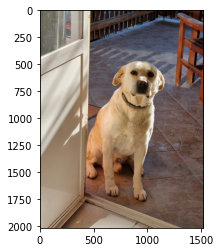

In [48]:
plt.imshow(pil_imgs[1])

In [30]:
import torch.nn.functional as F

def predict_model_TL(data_transform, model, image):
    with torch.no_grad():
        model.eval()

        image = data_transform(image).to(device)

        prediction = model(image)

        percentage = F.softmax(prediction, dim=1)

        _, y_pred = torch.max(prediction, 1)

        return y_pred.cpu().detach().numpy()[0], percentage

In [13]:
#Inception model
def get_inceptionV3_model(model_path):
  model = models.inception_v3(init_weights=True)

  num_ftrs = model.AuxLogits.fc.in_features
  model.AuxLogits.fc = nn.Linear(num_ftrs, 120)

  num_ftrs = model.fc.in_features
  model.fc = nn.Linear(num_ftrs, 120)

  model.load_state_dict(torch.load(path_drive + model_path))

  model = model.to(device)

  return model

The good doggo  Zara : 
   Type of resnet:  Resnet34_augmented
   What my network thinks the good doggo breed is? Norwegian_elkhound 43.5 %
   Type of resnet:  Resnet34
   What my network thinks the good doggo breed is? German_shepherd 53.1 %
   Type of resnet:  Resnet50_augmented
   What my network thinks the good doggo breed is? Chesapeake_Bay_retriever 29.27 %
   Type of resnet:  Resnet50
   What my network thinks the good doggo breed is? German_shepherd 95.83 %
   Type of inception:  Inceptionv3_augmented
   What my network thinks the good doggo breed is? German_shepherd 52.26 %
   Type of inception:  Inceptionv3
   What my network thinks the good doggo breed is? bloodhound 42.52 %

The good doggo  Beni1 : 
   Type of resnet:  Resnet34_augmented
   What my network thinks the good doggo breed is? Labrador_retriever 92.65 %
   Type of resnet:  Resnet34
   What my network thinks the good doggo breed is? Labrador_retriever 56.48 %
   Type of resnet:  Resnet50_augmented
   What my netwo

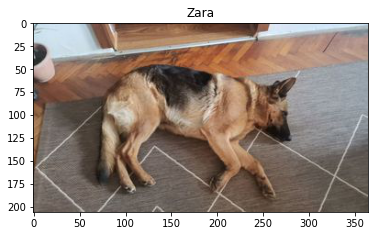

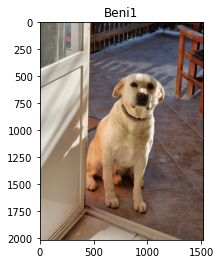

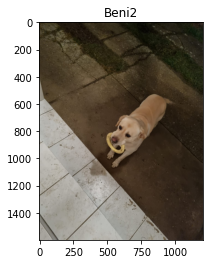

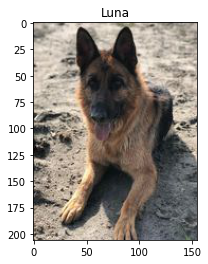

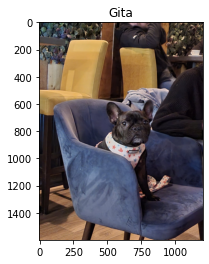

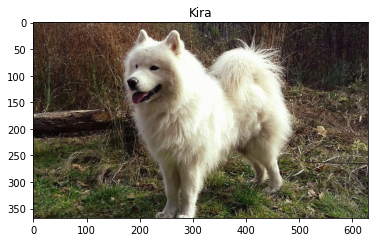

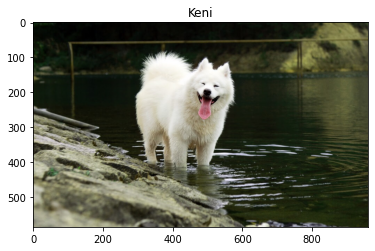

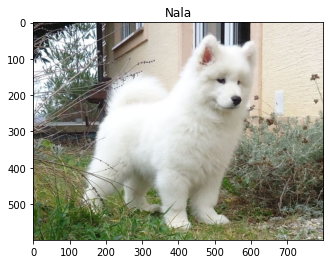

In [71]:
# resnet models
type_of_model = []
counter = -1
for image in pil_imgs:
  counter+= 1
  print("The good doggo ", doggo_names[counter][0:-5], ": ")
  plt.figure()
  plt.imshow(image)
  plt.title(doggo_names[counter][0:-5])
  for layer, model_path in zip([34, 34, 50, 50], resnet_models_paths):
    print("   Type of resnet: ", model_path[12:-3])
    klasa, prediction = predict_model_TL(get_data_transforms(224), get_resnet_model(layer, model_path),image)
    percentage = torch.max(prediction).item() * 100
    print("   What my network thinks the good doggo breed is?", classes_dict[klasa][10:], str(round(percentage, 2)), "%")
  for model_path in (inception_models_paths):
    print("   Type of inception: ", model_path[12:-3])
    klasa, prediction = predict_model_TL(get_data_transforms(299), get_inceptionV3_model(model_path), image)
    percentage = torch.max(prediction).item() * 100
    print("   What my network thinks the good doggo breed is?", classes_dict[klasa][10:], str(round(percentage, 2)), "%")
  print( )
  
